# Challenge: Find the relationship between Fare and survival in "titanic.csv"

## 1. Import the data, add a new column "Fare_interval", which is Fare with the ones digit removed

In [49]:
import pandas as pd
df = pd.read_csv('titanic.csv')
df['Fare_interval'] = df.Fare.astype(int) // 10 * 10

- The reason I did this is that I will use that to group the rows with the same range of Fare.
- For example, the rows with Fare 71.24, 73.89, 79.32, 74.34, etc will have the same Fare_interval: 70

In [53]:
df[['Survived', 'Fare', 'Fare_interval']].head()

,Survived,Fare,Fare_interval
0,0,7.2500,0
1,1,71.2833,70
2,1,7.9250,0
3,1,53.1000,50
4,0,8.0500,0


## 2. count the number of survived and not survived for every Fare range

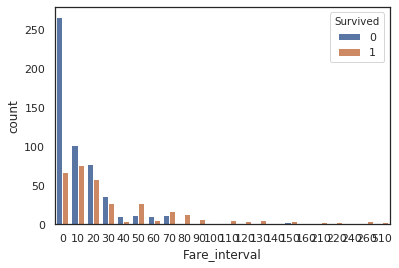

In [54]:
sns.countplot(x='Fare_interval',data=df,hue='Survived')

### An attendacy can be seen from the above graph that as the fare price goes up, the ratio of survived/unsurvived goes up. That means the higher the fare is, the more likely a passenger is survived
### But since the fare most people buy mostly concentrate on lower end, the cheaper prices, which makes it hard to see the situation on higher end. So I kind of zoomed in on both part by splitting the data to two parts

In [58]:
low_end_df = df[df['Fare_interval'] < 40]
high_end_df = df[df['Fare_interval'] >= 40]

#### lower end: passengers who bought relatively low-price fare (<40)

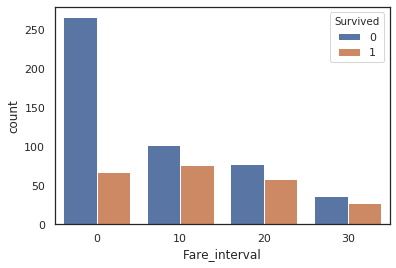

In [63]:
sns.countplot(x='Fare_interval',data=low_end_df,hue='Survived')

#### higher ends: passengers who bought relatively high-price fare (>=40)

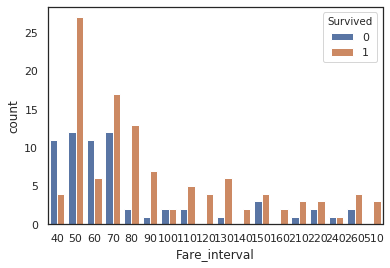

In [64]:
sns.countplot(x='Fare_interval',data=high_end_df,hue='Survived')

### These two graphs above reveals the same conclusion much more clearly

### 3. In order to be more quantitive, I calculated the survival rate in every Fare range, and made a drawing

In [90]:
## First split the data to two groups: survived and not_survived
survived = df[df['Survived']==1]
not_survived = df[df['Survived']==0]

## group by fare interval
survived_cnt = survived.groupby('Fare_interval').size()
not_survived_cnt = not_survived.groupby('Fare_interval').size()

## calculate the survival rate
survival_rate = survived_cnt / (survived_cnt + not_survived_cnt) * 100
print(survival_rate.head())

Fare_interval
0     20.120120
10    42.696629
20    42.647059
30    43.750000
40    26.666667
dtype: float64


Text(0, 0.5, 'survival rate/%')

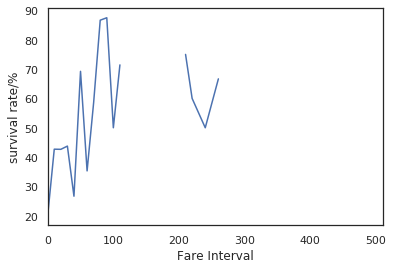

In [92]:
graph = survival_rate.plot()
graph.set_xlabel("Fare Interval")
graph.set_ylabel("survival rate/%")

### It is even more obvious that as the fare price goes up, the survival rate goes up, reaching a peak around 100.
### This means buying a ticket of $100 has the highest price–performance ratio.
